# Basic Operations on Images

## Pixel 개개의 값에 접근하고 수정하기.

In [12]:
import cv2
import numpy as np
import requests

def get_img(url,is_gray=True):
    image_ndarray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
    mode = cv2.IMREAD_UNCHANGED
    if is_gray:
        mode = cv2.IMREAD_GRAYSCALE
    img = cv2.imdecode(image_ndarray, mode)
    return img

url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/cat_cv.tif'
src = get_img(url)

if src is None:
    print('Error: invalid url!')
else:
    img = src.copy()

intensity = img[100,100]
print(f'img[100,100]={intensity}')

img[100,100]=122


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/messi5.jpg'

src = get_img(url,False)

if src is None:
    print('Error : Loading image')
else:
    print('OK : Loading image')
    img = src.copy()

intensity = img[100,100]
print(f'img[100,100]={intensity}')

OK : Loading image
img[100,100]=[157 166 200]


In [18]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


(50, 200, 3)


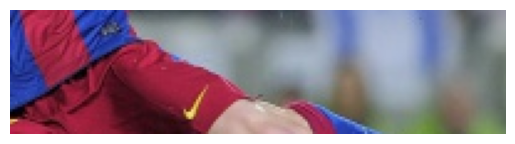

In [19]:
tmp = img[200:250,-300:-100]
print(tmp.shape)
plt.imshow(tmp[...,::-1])
plt.axis('off')
plt.show()

In [20]:
# accessing RED value
img.item(10,10,2)



59

In [21]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## Accessing Image Properties

In [22]:
print(img.shape)

(342, 548, 3)


In [23]:
print(img.dtype)

uint8


In [24]:
print(img.size)

size = 1
for i in img.shape:
    size=size *i
size = 0 if size == 1 else size
print(size)

562248
562248


## Image ROI

* `cv_roi.py`
* `cv_roi_cb.py`

## Splitting and Merging Image Channels.

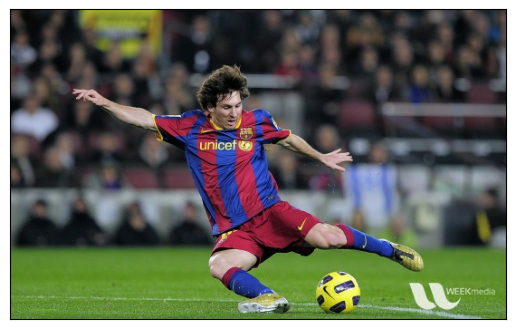

(342, 548)


In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# opencv
b,g,r = cv2.split(img)
img_rgb = cv2.merge((r,g,b))

plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

print(b.shape)

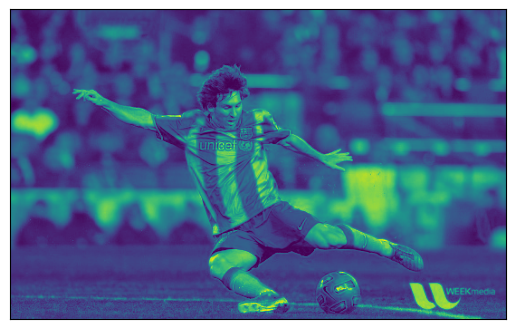

(342, 548, 1)


In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# numpy
b2,g2,r2 = np.dsplit(img,3)

plt.imshow(b2)
plt.xticks([]),plt.yticks([])
plt.show()
print(b2.shape)

In [28]:
print(b2.shape)
b2 = np.squeeze(b2)
print(np.array_equal(b,b2))
print(b.shape)
print(b2.shape)

(342, 548, 1)
True
(342, 548)
(342, 548)
